<h1><span style='font-family: "Trebuchet MS", Helvetica, sans-serif;'>Statistical NLP Part-1 - Text Classification
</span></h1>

<h4><ul>
    <li>
        <span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;"><strong>DOMAIN:</strong> Digital content management</span>
    </li>
</ul></h4>

<h4><ul>
    <li>
        <article><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">CONTEXT:</span></strong></article>
    </li>
</ul>
<article>
    <font face="Trebuchet MS, Helvetica, sans-serif">Classification is probably the most popular task that you would deal with in real life. Text in the form of blogs, posts, articles,
etc. is written every second. It is a challenge to predict the information about the writer without knowing about him/her. We are going to
create a classifier that predicts multiple features of the author of a given text. We have designed it as a Multi label classification problem</font>
</article> </h4>

<h4><ul>
    <li>
        <article><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;"><strong>DATA DESCRIPTION:</strong></span></article>
    </li>
</ul>
<article><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Over 600,000 posts from more than 19 thousand bloggers The Blog Authorship Corpus consists of the collected posts of 19,320 bloggers gathered from blogger.com in August 2004. The corpus incorporates a total of 681,288 posts and over 140 million
words - or approximately 35 posts and 7250 words per person. Each blog is presented as a separate file, the name of which indicates a
blogger id# and the blogger’s self-provided gender, age, industry, and astrological sign. (All are labelled for gender and age but for many,
industry and/or sign is marked as unknown.)
    <a href="https://www.kaggle.com/rtatman/blog-authorship-corpus">[Source]</a></span></article>
    </h4>

<font face="Trebuchet MS, Helvetica, sans-serif">All bloggers included in the corpus fall into one of three age groups:
* 8240 "10s" blogs (ages 13-17)
* 8086 "20s" blogs(ages 23-27) and
* 2994 "30s" blogs (ages 33-47)

For each age group, there is an equal number of male and female bloggers.
Each blog in the corpus includes at least 200 occurrences of common English words. All formatting has been stripped with two exceptions.
Individual posts within a single blogger are separated by the date of the following post and links within a post are denoted by the label url
link.</font>

<h4>
<ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">PROJECT OBJECTIVE:</span></strong></li>
</ul>
<p><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">The need is to build a NLP classifier which can use input text parameters to determine the label/s of the blog.</span></p>
    </h4>

In [1]:
# !conda install dtale -c conda-forge
# if you want to also use "Export to PNG" for charts
# !conda install -c plotly python-kaleido

In [2]:
# imports

import os
import dtale
import random
import warnings
from time import time
from math import floor
from pathlib import Path
import pandas as pd, numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from collections import defaultdict
import tensorflow as tf
tqdm.pandas()
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
# reproducibility
seed = 7
random.seed(seed)

<h3><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Import the data.</span></strong></li>
</ul></h3>

In [4]:
blog_df = pd.read_csv('./data/blogtext.csv')
d = dtale.show(blog_df)
d

2021-07-25 18:25:51,567 - INFO     - Note: NumExpr detected 16 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2021-07-25 18:25:51,568 - INFO     - NumExpr defaulting to 8 threads.


In [5]:
# 681284 blog texts
blog_df.shape 

(681284, 7)

In [6]:
blog_df.isna().sum()  # no null values, dataset is good in terms of data completeness

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

In [7]:
blog_df.info()  # topic, sing columns to be converted to categorical and date can be split into day, month, year if required for analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      681284 non-null  int64 
 1   gender  681284 non-null  object
 2   age     681284 non-null  int64 
 3   topic   681284 non-null  object
 4   sign    681284 non-null  object
 5   date    681284 non-null  object
 6   text    681284 non-null  object
dtypes: int64(2), object(5)
memory usage: 36.4+ MB


In [8]:
blog_df['id'] = pd.Categorical(blog_df.id)
blog_df['topic'] = pd.Categorical(blog_df.topic)
blog_df['sign'] = pd.Categorical(blog_df.sign)
blog_df['text'] = blog_df['text'].fillna('').apply(str)

In [9]:
blog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681284 entries, 0 to 681283
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype   
---  ------  --------------   -----   
 0   id      681284 non-null  category
 1   gender  681284 non-null  object  
 2   age     681284 non-null  int64   
 3   topic   681284 non-null  category
 4   sign    681284 non-null  category
 5   date    681284 non-null  object  
 6   text    681284 non-null  object  
dtypes: category(3), int64(1), object(3)
memory usage: 24.0+ MB


In [10]:
# Imbalanced classes!
blog_df.topic.value_counts()

indUnk                     251015
Student                    153903
Technology                  42055
Arts                        32449
Education                   29633
Communications-Media        20140
Internet                    16006
Non-Profit                  14700
Engineering                 11653
Law                          9040
Publishing                   7753
Science                      7269
Government                   6907
Consulting                   5862
Religion                     5235
Fashion                      4851
Marketing                    4769
Advertising                  4676
BusinessServices             4500
Banking                      4049
Chemicals                    3928
Telecommunications           3891
Accounting                   3832
Military                     3128
Museums-Libraries            3096
Sports-Recreation            3038
HumanResources               3010
RealEstate                   2870
Transportation               2326
Manufacturing 

In [11]:
blog_df.sign.value_counts()

Cancer         65048
Aries          64979
Taurus         62561
Libra          62363
Virgo          60399
Scorpio        57161
Pisces         54053
Leo            53811
Gemini         51985
Sagittarius    50036
Aquarius       49687
Capricorn      49201
Name: sign, dtype: int64

In [12]:
# !pip install langdetect

In [13]:
# Looking for languages
from langdetect import detect_langs, LangDetectException
from collections import defaultdict

languages = []
lang_samples = defaultdict(list)
# pick random texts out of the dataset as langauge detection on every text is not feasible
samples = np.random.choice(len(blog_df.text), size=5000, replace=False)
# Loop over the rows of the dataset and append  
for row in tqdm(samples):
    try:
        text = blog_df.text[row]
        lang = detect_langs(text)
        clean_lang = str(lang).split(':')[0][1:]
        lang_samples[clean_lang].append(text)
        languages.append(clean_lang)
    except LangDetectException:
        pass

print("Unique languages in the reviews: "
     f"{np.unique(languages)}")

100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:28<00:00, 174.63it/s]

Unique languages in the reviews: ['af' 'cy' 'da' 'de' 'en' 'es' 'et' 'fi' 'fr' 'hu' 'id' 'it' 'ko' 'lt'
 'nl' 'no' 'pl' 'pt' 'ro' 'ru' 'sk' 'sl' 'so' 'sv' 'tl' 'tr' 'vi' 'zh-cn']


In [14]:
for i in lang_samples:
    print(i)
    print(random.sample(lang_samples[i], 1))
    print('')

en
["            NOTE: You may want to edit your posts so they don't include the HeppSTAW name, folks... would you really want (P)ank (Fr)ate finding out how much you weight? And since blogs ARE included in most search engines....             "]

de
['    urlLink    Gerbera&nbsp; urlLink    ']

lt
['        urlLink     &nbsp; urlLink            ']

nl
['        urlLink    costume jewelry  urlLink        ']

tl
['           Hintayin ko na tanong ni Debb para maging organized ang game.         ']

no
["        urlLink jonbetter.com's breakout     "]

af
['        urlLink    Room 309, The Premier Room&nbsp; urlLink            ']

sv
['            urlLink    Tavallodi Digar - Shoja&#39;eddin Shafa&nbsp; urlLink            ']

da
['       *deleted*    ']

et
['       aaaaaaaaaaaaaw, kate finks mitch is one in a million. shame she still likes u-know-who.         ']

hu
['        urlLink    Get A Job    ']

pl
['             My two babies.         ']

id
["                 leaving dundee tomo

<h5><ul>
<span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">
    <li>There are multiple languages and character sets in the dataset!
 </span></ul></h5>

<h3><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Visualize</span></strong></li>
</ul></h3>

In [15]:
blog_df.columns

Index(['id', 'gender', 'age', 'topic', 'sign', 'date', 'text'], dtype='object')

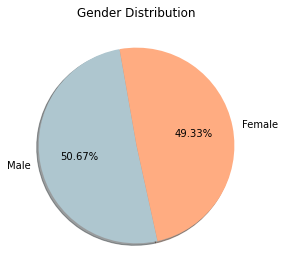

In [16]:
# plotting the gender distribution

males = len(blog_df[blog_df['gender'] == 'male'])
females = len(blog_df[blog_df['gender'] == 'female'])
plt.pie(x=[males, females], explode=(0, 0), labels=['Male', 'Female'], autopct='%1.2f%%',
        shadow=True, startangle=100, colors=['#aec6cf', '#ffac81'])
fig = plt.gcf()
fig.set_size_inches(4.5, 4.5)
plt.title('Gender Distribution')
plt.show()

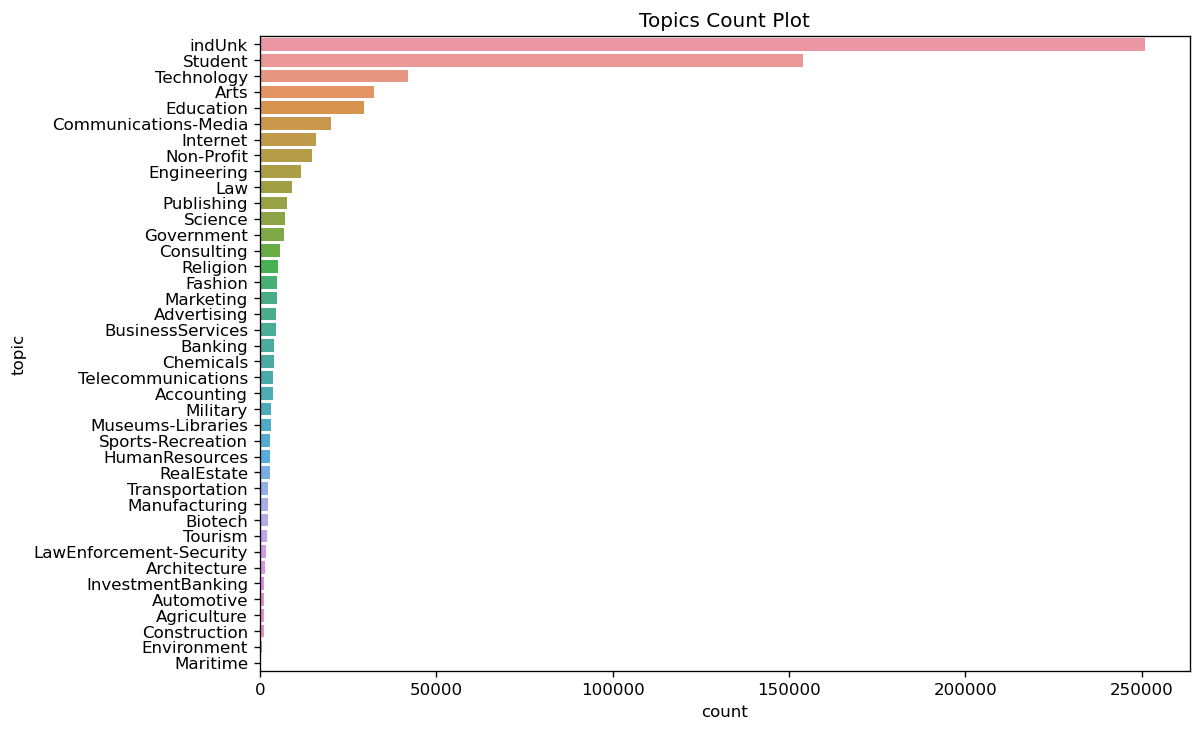

In [17]:
# plotting topic counts distribution
plt.figure(figsize=(10, 7), dpi=120)
sns.countplot(y='topic', data=blog_df, order=blog_df.topic.value_counts().index)
plt.title('Topics Count Plot')
plt.show()

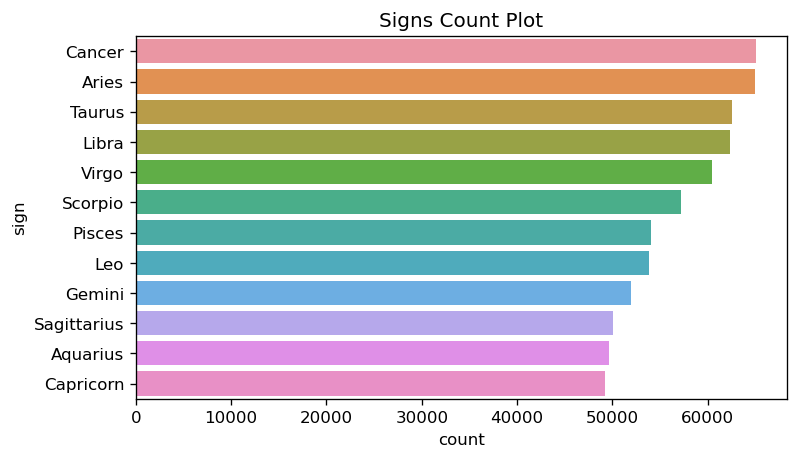

In [18]:
# plotting sign counts distribution
plt.figure(figsize=(7, 4), dpi=120)
sns.countplot(y='sign', data=blog_df, order=blog_df.sign.value_counts().index)
plt.title('Signs Count Plot')
plt.show()

In [19]:
from collections import Counter

# top 50 most frequent words in text
top_N = 50

words = (blog_df.text.str.cat(sep=' ').split())
rslt = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

In [20]:
rslt[:50].transpose()

Word,the,to,I,and,a,of,in,that,is,my,...,urlLink,they,get,will,one,what,do,can,if,when
Frequency,4785809,3842654,3546837,3303447,2750057,2362870,1600803,1540799,1318972,1300183,...,383203,375996,373894,356786,353458,344863,333600,322942,320169,319320


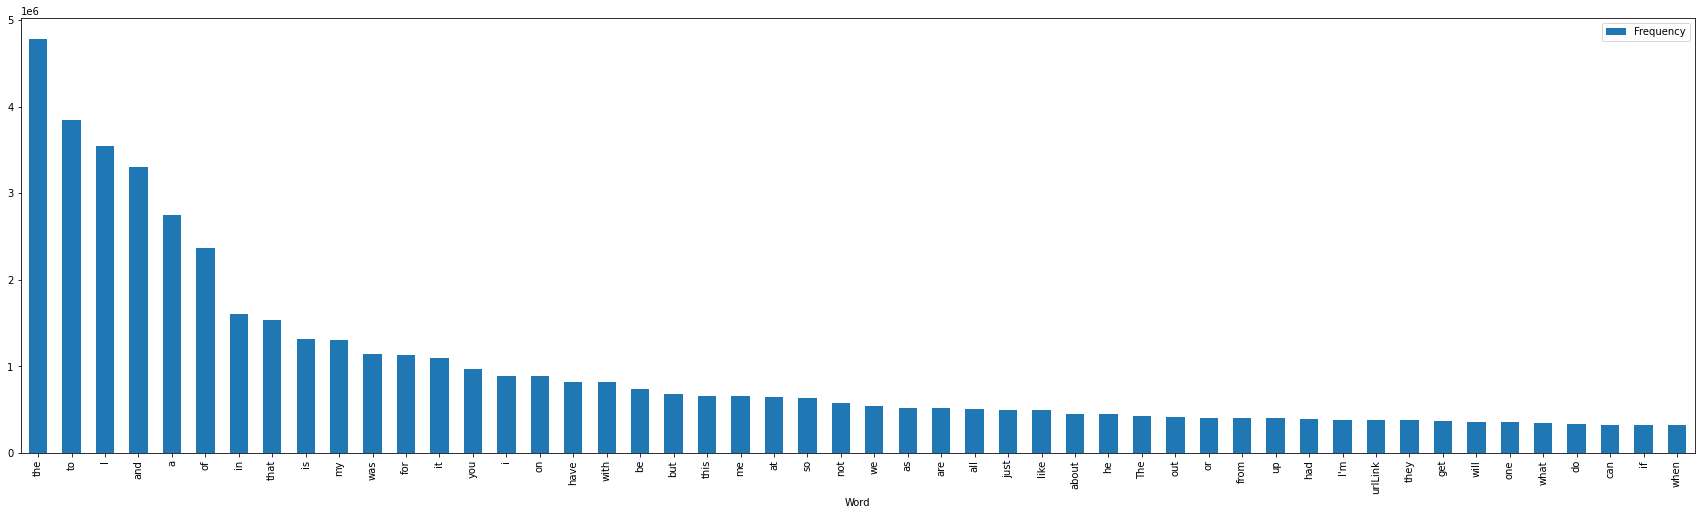

In [21]:
rslt.plot.bar(rot=0, figsize=(30,8), width=0.55)
plt.xticks(rotation=90)
plt.show()

In [22]:
pprint(rslt.index.tolist(), compact=True)

['the', 'to', 'I', 'and', 'a', 'of', 'in', 'that', 'is', 'my', 'was', 'for',
 'it', 'you', 'i', 'on', 'have', 'with', 'be', 'but', 'this', 'me', 'at', 'so',
 'not', 'we', 'as', 'are', 'all', 'just', 'like', 'about', 'he', 'The', 'out',
 'or', 'from', 'up', 'had', "I'm", 'urlLink', 'they', 'get', 'will', 'one',
 'what', 'do', 'can', 'if', 'when']


<h5><ul>
<span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">
    <li>Many stopwords are occuring most frequently in the dataset, We will clean these in the preprocessing step
 </span></ul></h5>

In [23]:
def get_text_len(row):
    row['char_len'] = len(row.text)
    row['word_len'] = len(row.text.split())
    return row

blog_df = blog_df.progress_apply(get_text_len, axis=1)

100%|████████████████████████████████████████████████████████████████████████| 681284/681284 [11:02<00:00, 1028.75it/s]


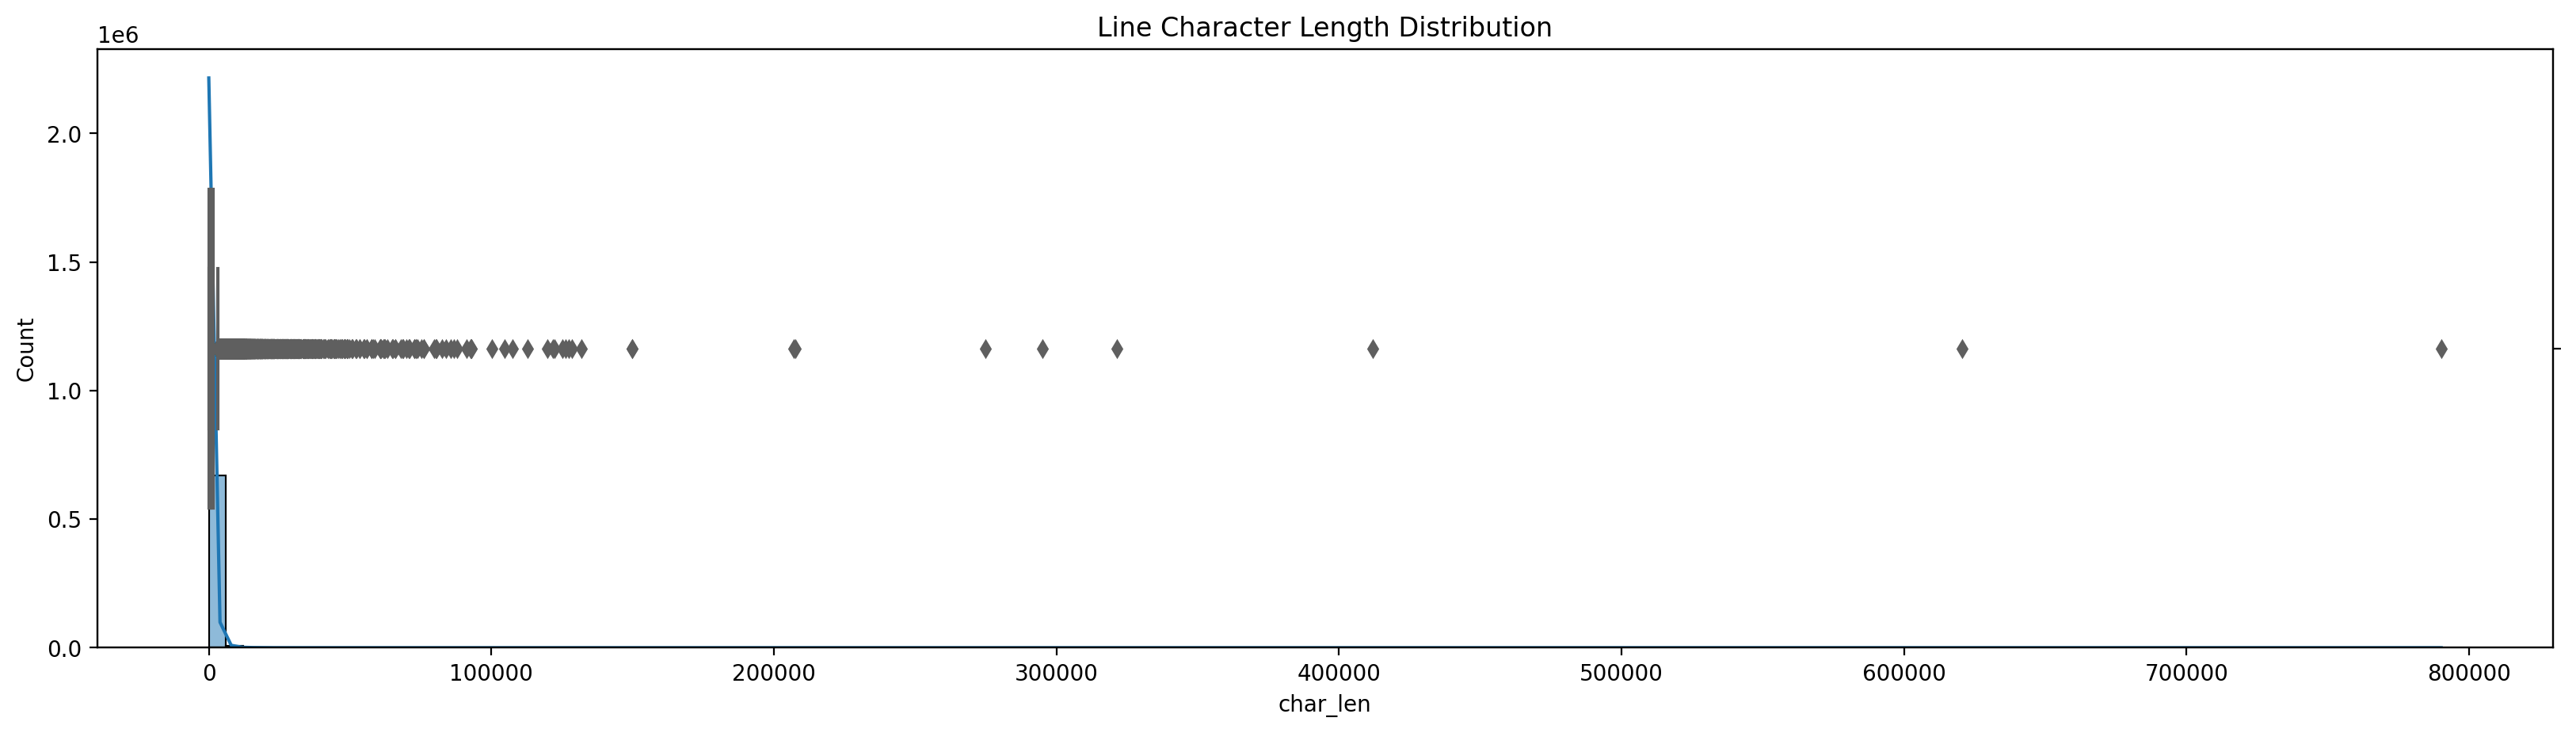

In [24]:
plt.figure(figsize=(20, 5), dpi=200)
ax = sns.histplot(x=blog_df.char_len, kde=True, bins=130)
ax2 = ax.twinx()
sns.boxplot(x=blog_df.char_len, ax=ax2, color='#EE6050')
ax2.set(ylim=(-.75, .75))
plt.title('Line Character Length Distribution')
plt.show()

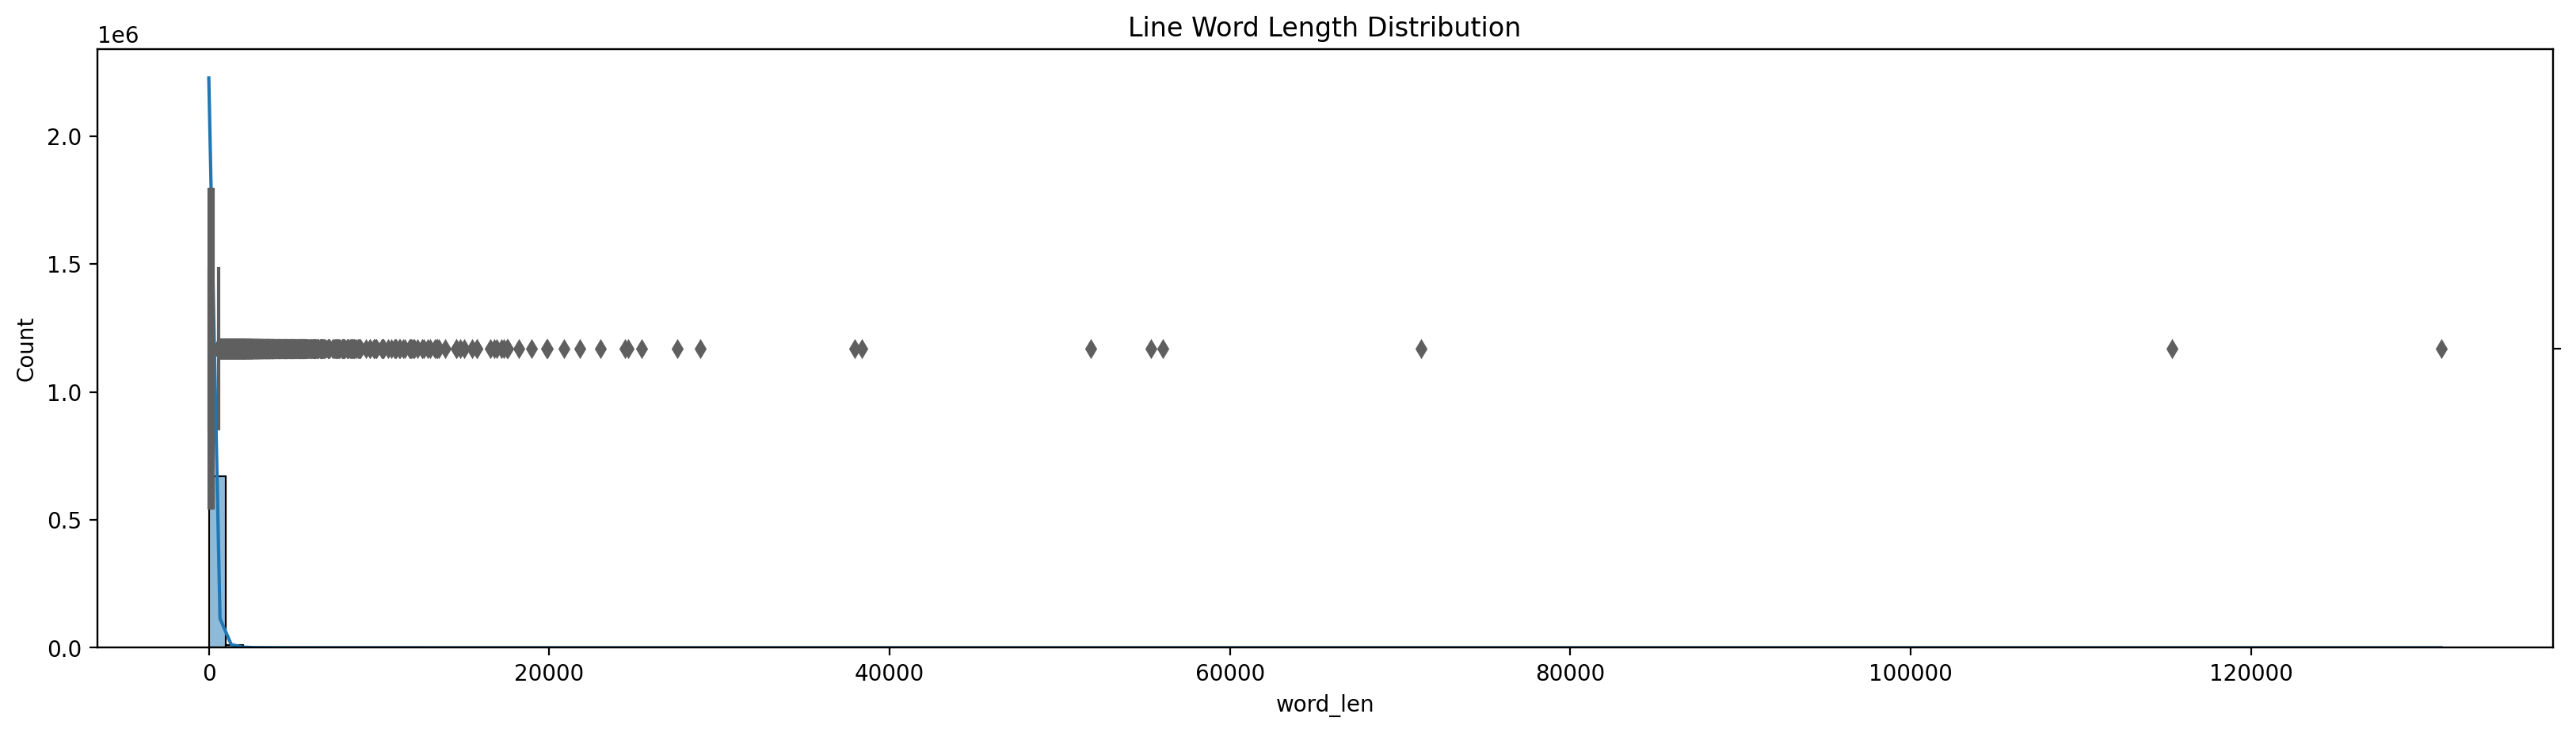

In [25]:
plt.figure(figsize=(20, 5), dpi=200)
ax = sns.histplot(x=blog_df.word_len, kde=True, bins=130)
ax2 = ax.twinx()
sns.boxplot(x=blog_df.word_len, ax=ax2, color='#EE6050')
ax2.set(ylim=(-.75, .75))
plt.title('Line Word Length Distribution')
plt.show()

In [26]:
blog_df.describe()

,id,age,char_len,word_len
count,6.812840e+05,681284.000000,681284.000000,681284.000000
mean,2.397802e+06,23.932326,1120.730698,200.786742
std,1.247723e+06,7.786009,2328.437003,415.160622
min,5.114000e+03,13.000000,4.000000,0.000000
25%,1.239610e+06,17.000000,230.000000,37.000000
50%,2.607577e+06,24.000000,637.000000,112.000000
75%,3.525660e+06,26.000000,1407.000000,255.000000
max,4.337650e+06,48.000000,790123.000000,131169.000000


<h5><ul>
<span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">
    <li>Most blog texts have between 0 and 500 with median at 112 with relatively few outliers raning till 1,31,169 words!<br>
        This imblance in text lengths will cause problem to classify the texts and we'll have to deal with it in preprocessing. 
 </span></ul></h5>

<h3><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Data Preprocessing</span></strong></li>
</ul></h3>

<h5><ul>
<span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">
    <li>Data cleansing by removing unwanted characters, spaces, stop words etc. Convert text to lowercase
     </span></ul></h5>

In [27]:
# !pip install contractions
# !pip install beautifulsoup4

In [28]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\surya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\surya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
# utility functions for text preprocesing
import re
import string
import unicodedata
import contractions
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.snowball import SnowballStemmer

CUSTOM = True

stemmer = SnowballStemmer('english')
if CUSTOM:
    stop_words = set(nltk.corpus.stopwords.words('english'))
    # custom stopwords added from the most frequent words which are generic 
    # and might not relate to the sentiment of the review
    stop_words.update(['urllink'])
else:
    stop_words = set(nltk.corpus.stopwords.words('english'))

def replace_accented_chars(review_text):
    '''normalizes and replaces accented characters'''
    unaccented_text = unicodedata.normalize('NFKD', review_text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return unaccented_text



def strip_html_tags(review_text):
    '''strips html tags like <h4> ..etc'''
    soup = BeautifulSoup(review_text, "html.parser")
    [s.extract() for s in soup(['iframe', 'script'])]
    stripped_text = soup.get_text()
    stripped_text = re.sub(r'[\r|\n|\r\n]+', '\n', stripped_text)
    return stripped_text


def expand_contractions(review_text):
    review_text = contractions.fix(review_text)
    return review_text


def remove_special_characters(review_text):
    '''
    Remove special characters but preserve digits and excalamation marks
    as they indicate emotionally charged review '''
    review_text = re.sub(r"[^A-Za-z0-9!?\'\`]", " ", review_text)
    return review_text


def strip_stops(text, is_lower_case=False, stop_words=stop_words):
    '''strip stopwrds'''
    tokens = word_tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stop_words]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text


def snowball_stem(text, stemmer=stemmer):
    '''stemming using snowball stemmer'''
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    review_text = " ".join(stemmed_words)
    return review_text

In [30]:
def preprocess_text(text: str, lower=True, srip_punctuation=True) -> str:
    text = replace_accented_chars(text)
    text = strip_html_tags(text)
    text = expand_contractions(text)
    text = remove_special_characters(text)
    
    if lower:
        text = text.lower()
    text = strip_stops(text)
    text = snowball_stem(text)
    return str(text.strip())

def preprocess(row):
    text = row.text
    if isinstance(text, str):
        text = preprocess_text(text)
    else:
        text = np.nan
    row['cleaned_text'] = text
    return row

In [31]:
blog_df = blog_df.progress_apply(preprocess, axis=1)

100%|█████████████████████████████████████████████████████████████████████████| 681284/681284 [29:17<00:00, 387.60it/s]


In [32]:
# all texts cleaned successfully
blog_df.isna().any()

id              False
gender          False
age             False
topic           False
sign            False
date            False
text            False
char_len        False
word_len        False
cleaned_text    False
dtype: bool

In [33]:
blog_df.sample(20)

,id,gender,age,topic,sign,date,text,char_len,word_len,cleaned_text
114792,3543301,female,24,Non-Profit,Gemini,"03,August,2004",urlLink for real . i need to go h...,155,27,real need go home get lunch get foot massag ma...
599440,3535546,male,14,indUnk,Sagittarius,"10,June,2004",......................................,634,80,someth read notic notic notic worth notic noti...
241859,529513,male,33,Internet,Taurus,"16,November,2003",This was the 4th or 5th time in my ...,122,17,4th 5th time life tie http www weh de memori html
321892,963380,male,24,Student,Cancer,"20,January,2003","Good morning sunshine, as it's put in t...",1001,188,good morn sunshin put parlanc time drive home ...
551120,1125546,male,27,Law,Aries,"26,July,2004","I must say, Barack Obama was impressive...",318,48,must say barack obama impress communic skill g...
30505,3687738,male,47,indUnk,Aries,"12,agosto,2004","¿Acaso, el escenario descrito en el D...",648,103,acaso el escenario descrito en el dia despu de...
552488,3056329,male,17,Government,Libra,"15,May,2004",hey!! I havent blogged in awhile!...,704,125,hey ! ! blog awhil ! ultim frisbe fun ! bad wo...
380569,1417798,female,35,indUnk,Scorpio,"15,September,2003",Hottie Alert! Greg K. just g...,698,119,hotti alert ! greg k gave think first report d...
61256,2871824,male,24,Engineering,Leo,"04,May,2004",Last 3 days quite happy lor because...,970,190,last 3 day quit happi lor famili gather togeth...
150862,2427534,male,25,indUnk,Leo,"02,July,2004",Where's my poker? Just finishe...,1143,176,poker ? finish read wittgenstein 's poker ' da...


In [34]:
top_N = 50

# top 50 most frequent words in cleaned text
words = (blog_df.cleaned_text.str.cat(sep=' ').split())
rslt = pd.DataFrame(Counter(words).most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

In [35]:
rslt[:50].transpose()

Word,!,?,',go,like,get,one,time,would,'s,...,need,right,still,life,new,someth,first,tri,night,start
Frequency,1433386,827744,807814,615740,606031,511351,487906,435766,433882,431960,...,176987,176689,175512,174260,172079,169346,163264,162341,161141,159527


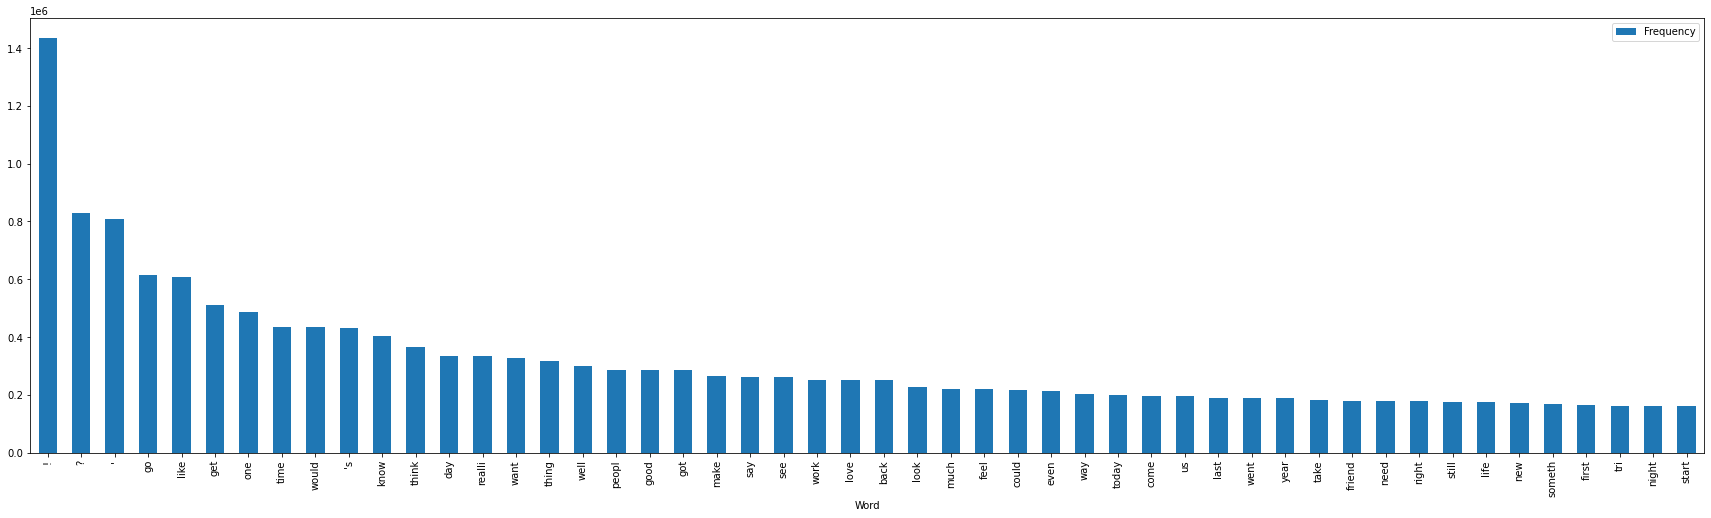

In [36]:
rslt.plot.bar(rot=0, figsize=(30,8), width=0.55)
plt.xticks(rotation=90)
plt.show()

In [37]:
pprint(rslt.index.tolist(), compact=True)

['!', '?', "'", 'go', 'like', 'get', 'one', 'time', 'would', "'s", 'know',
 'think', 'day', 'realli', 'want', 'thing', 'well', 'peopl', 'good', 'got',
 'make', 'say', 'see', 'work', 'love', 'back', 'look', 'much', 'feel', 'could',
 'even', 'way', 'today', 'come', 'us', 'last', 'went', 'year', 'take', 'friend',
 'need', 'right', 'still', 'life', 'new', 'someth', 'first', 'tri', 'night',
 'start']


<h5><ul>
<span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">
    <li>Target/label merger and transformation
     </span></ul></h5>

In [80]:
# merge all labels together as we want to do multi-label classification
blog_df['labels'] = blog_df[['gender','age','topic','sign']].values.tolist()

In [81]:

dataset = blog_df.drop(columns = ['id','gender','age','topic','sign','date', 'text'])

<h5><ul>
<span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">
    <li>Split dataset into train-test cuts
     </span></ul></h5>

In [82]:
from sklearn.model_selection import train_test_split

# Train-Test split of 80-20
X_train, X_test, y_train, y_test = train_test_split(dataset['cleaned_text'], dataset['labels'], test_size=0.20)

In [83]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((545027,), (136257,), (545027,), (136257,))

<h5><ul>
<span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">
    <li>Vectorisation
     </span></ul></h5>

In [113]:
NGRAM_RANGE = (1, 2)
TOP_K = 30000
TOKEN_MODE = 'word'
MIN_DOC_FREQ = 2

kwargs = {
    'ngram_range' : NGRAM_RANGE,
    'dtype' : 'int32',
    'strip_accents' : 'unicode',
    'decode_error' : 'replace',
    'analyzer' : TOKEN_MODE,
    'min_df' : MIN_DOC_FREQ,
    'max_features': TOP_K
}

In [114]:
# vectorize the texts to get features
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, f_classif

vectorizer = TfidfVectorizer(**kwargs)

X_train_vec = vectorizer.fit_transform(X_train)

In [115]:
X_train_vec.shape

(545027, 30000)

In [116]:
# do not fit on X_test to avoid data leakakge, only transform
X_test_vec = vectorizer.transform(X_test)

In [117]:
X_train_vec[0].shape

(1, 30000)

In [118]:
X_test_vec[0].shape

(1, 30000)

<h5><ul>
<span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">
    <li>Transform labels
     </span></ul></h5>

In [119]:
y_train[0]

['female', '23', 'Advertising', 'Taurus']

In [120]:
# use MultiLabelBinarizer to transform labels in a binary form so that the prediction will be a mask of 0s and 1s
from sklearn.preprocessing import MultiLabelBinarizer

binarizer = MultiLabelBinarizer()

# convert all labels to str
y_train = [[str(i) for i in j] for j in y_train]
y_test = [[str(i) for i in j] for j in y_test]

y_train_labels = binarizer.fit_transform(y_train)

# only transform test data to avoid data leakage
y_test_labels = binarizer.transform(y_test)

y_train_labels.shape, y_test_labels.shape

((545027, 80), (136257, 80))

In [121]:
# converted to one hot vectors, each category here is a combination of labels from possible combinations of labels
y_train_labels[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0])

<h3><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Train Text Classifiers</span></strong></li>
</ul></h3>

In [122]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

<h4><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Logistic Regression</span></strong></li>
</ul></h4>

In [123]:
# wrapper for lr classfier to be able to predict among classes
lr = OneVsRestClassifier(LogisticRegression(solver='lbfgs'), n_jobs=8)

In [124]:
lr.fit(X_train_vec, y_train_labels)

OneVsRestClassifier(estimator=LogisticRegression(), n_jobs=8)

In [127]:
pred = lr.predict(X_test_vec)

In [128]:
# classification report
print(classification_report(y_test_labels, pred))

              precision    recall  f1-score   support

           0       0.80      0.04      0.07      2696
           1       0.66      0.06      0.11      5397
           2       0.59      0.06      0.12      8288
           3       0.68      0.11      0.19     14565
           4       0.66      0.11      0.18     16374
           5       0.69      0.03      0.05     14517
           6       0.81      0.04      0.07     16103
           7       0.69      0.02      0.05     13237
           8       0.76      0.03      0.05     11033
           9       0.74      0.03      0.05      9232
          10       0.98      0.03      0.05      3456
          11       0.90      0.11      0.20      4373
          12       0.75      0.05      0.10      3481
          13       0.87      0.07      0.12      2930
          14       0.98      0.07      0.13      1835
          15       0.91      0.03      0.06      1472
          16       0.92      0.01      0.02      1072
          17       0.98    

<h3><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Metrics: </span></strong></li>
</ul></h3>

<table style="width:100%">
  <tr>
    <th>Metrics for the model</th>
    <th>Precision</th>
    <th>Recall</th>
  </tr>
  <tr>
    <td>Micro Average</td>
    <td>0.68</td>
    <td>0.23</td>
  </tr>
<tr>
    <td>Macro Average</td>
    <td>0.71</td>
    <td>0.06</td>
  </tr>
  <tr>
    <td>Weighted Average</td>
    <td>0.71</td>
    <td>0.23</td>
  </tr>
</table>

<h4><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Micro-averaged Precision is calculated as precision of Total values:</span></strong></li>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">all samples equally contribute to the final averaged metric</span></strong></li>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Macro-averaged Precision is calculated as an average of Precisions of all classes:</span></strong></li>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">all classes equally contribute to the final averaged metric</span></strong></li>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Weighted-averaged Precision is also calculated based on Precision per class but takes into account the number of samples of each class in the data:</span></strong></li>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">each classes’s contribution to the average is weighted by its size</span></strong></li>


    
</ul>

Which metric is relevant depends on If there is a class-imbalanced dataset? Is one class more important to get right than others? If you have an under-represented class which is important to your problem, macro-averaging may better, as it will highlight the performance of a model on all classes equally. On the other hand, if the assumption that all classes are equally important is not true, macro-averaging will over-emphasize the low performance on an infrequent class. Micro-averaging may be preferred in multilabel settings, including multiclass classification where a majority class is to be ignored.
</h4>

<h4><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">So, our model acheived a micro-avg f1-score of 0.34, macro-avg f1-score of 0.09. If we care about the minoority classes as well in the final classification, our model isn't up to the mark and might be further improved by cleaning the texts with multiple languages and performing oversampling/undersampling or SMOTE to deal with the class imbalance. Further, we can use BERT or other Attention-based classifiers which are much better at text classification tasks.</span></strong></li>
</ul></h4>

<h3><ul>
    <li><strong><span style="font-family: 'Trebuchet MS', Helvetica, sans-serif;">Print the true vs predicted labels for any 5 entries from the dataset</span></strong></li>
</ul></h3>

In [140]:
from random import sample

# Getting real labels from transformed predicted labels
pred_classes = binarizer.inverse_transform(pred)

#Picking 5 random records from y_test and comparing actual labels vs predicted labels for those 5 records
for i in sample(range(len(pred)),  5):
    print(i)
    print("Actual labels: ", y_test[i])
    print("Predicted labels:", pred_classes[i])
    print()

78708
Actual labels:  ['female', '14', 'Student', 'Virgo']
Predicted labels: ('female',)

129791
Actual labels:  ['male', '27', 'Technology', 'Libra']
Predicted labels: ('male',)

90040
Actual labels:  ['male', '24', 'Technology', 'Libra']
Predicted labels: ('male',)

117659
Actual labels:  ['male', '24', 'Education', 'Leo']
Predicted labels: ('female', 'indUnk')

75481
Actual labels:  ['female', '33', 'Communications-Media', 'Scorpio']
Predicted labels: ('male',)

